<a href="https://colab.research.google.com/github/Regita17/Pemrograman-Python/blob/main/Pertemuan%2011_image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [167]:
ls

 DAUN/  'foto daun.jpg'   Untitled  'Untitled (1)'


In [168]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [169]:
print("[INFO] loading images...")
imagePaths = paths.list_images("DAUN")
data = []
labels = []

[INFO] loading images...


In [170]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [171]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [172]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [173]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [174]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(435, 128, 128, 3)
(145, 128, 128, 3)


In [175]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               1440100   
_________________________________________________________________
dense_31 (Dense)             (None, 5)               

In [177]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [178]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 3s 247ms/step - loss: 2.4551 - accuracy: 0.2253 - val_loss: 1.6100 - val_accuracy: 0.2345
Epoch 2/25
14/14 [==============================] - 3s 240ms/step - loss: 1.5268 - accuracy: 0.3471 - val_loss: 1.4461 - val_accuracy: 0.4759
Epoch 3/25
14/14 [==============================] - 3s 243ms/step - loss: 1.3856 - accuracy: 0.4690 - val_loss: 1.3304 - val_accuracy: 0.4966
Epoch 4/25
14/14 [==============================] - 3s 247ms/step - loss: 1.2238 - accuracy: 0.5080 - val_loss: 1.2090 - val_accuracy: 0.5172
Epoch 5/25
14/14 [==============================] - 3s 242ms/step - loss: 1.1125 - accuracy: 0.5862 - val_loss: 1.0516 - val_accuracy: 0.6483
Epoch 6/25
14/14 [==============================] - 3s 244ms/step - loss: 0.9749 - accuracy: 0.6575 - val_loss: 0.9636 - val_accuracy: 0.6345
Epoch 7/25
14/14 [==============================] - 3s 244ms/step - loss: 0.9005 - accuracy: 0.6368 - val_loss: 0.8816 - val_accuracy: 0.6759
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


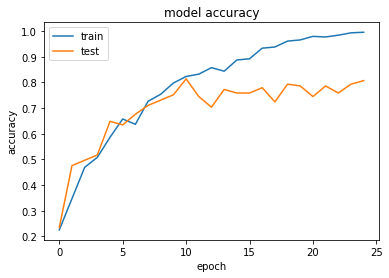

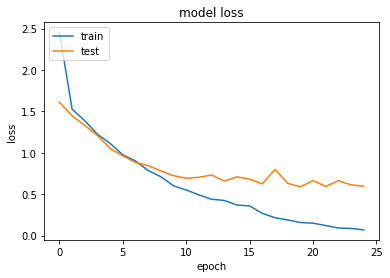

In [193]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [192]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.76      0.94      0.84        31
      GMB_03       0.78      0.75      0.77        24
      GMB_06       0.76      0.69      0.72        32
      GMB_08       0.83      0.80      0.82        25
      GMB_10       0.90      0.85      0.88        33

    accuracy                           0.81       145
   macro avg       0.81      0.80      0.80       145
weighted avg       0.81      0.81      0.81       145



In [194]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [198]:
import cv2
import matplotlib.pyplot as plt
image1='foto daun.jpg'

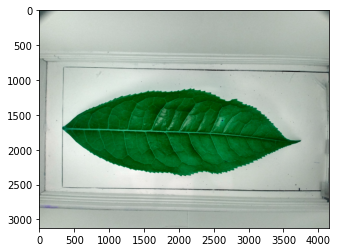

<class 'numpy.ndarray'>


In [199]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
print(type(img_array))

In [208]:
image_testing = Image.open('foto daun.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [209]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [212]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.3728048e-02 2.3194592e-05 9.6528363e-01 6.7917828e-04 2.8593044e-04]]
['GMB_06']
